### 카이제곱 검정(교차분석)

In [1]:
# 필요한 패키지 설치

import scipy.stats
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/smoker.csv")

# 데이터 샘플 확인
df.head()

,sex,smoke
0,male,Non-Smoker
1,male,Smoker
2,male,Non-Smoker
3,male,Smoker
4,male,Non-Smoker


In [4]:
# 항목 별 집계

df.groupby(['sex','smoke'])['smoke'].count()

#남성과 여성의 흡연자와 비흡연자수 현황을 확인하기 위해 groupby() 함수로 집계 데이터를 산출한다.
#여성 62 중 12명이 흡연자 남성은 69명 중 29명이 흡연자이다.

sex     smoke     
female  Non-Smoker    50
        Smoker        12
male    Non-Smoker    40
        Smoker        29
Name: smoke, dtype: int64

In [5]:
# 카이제곱 검정용 데이터셋 가공

crosstab = pd.crosstab(df.sex, df.smoke)
crosstab

#기존 데이터를 카이제곱 검정용 데이터셋으로 가공한다.(교차표의 형태로 가공했다)

smoke,Non-Smoker,Smoker
sex,,
female,50,12
male,40,29


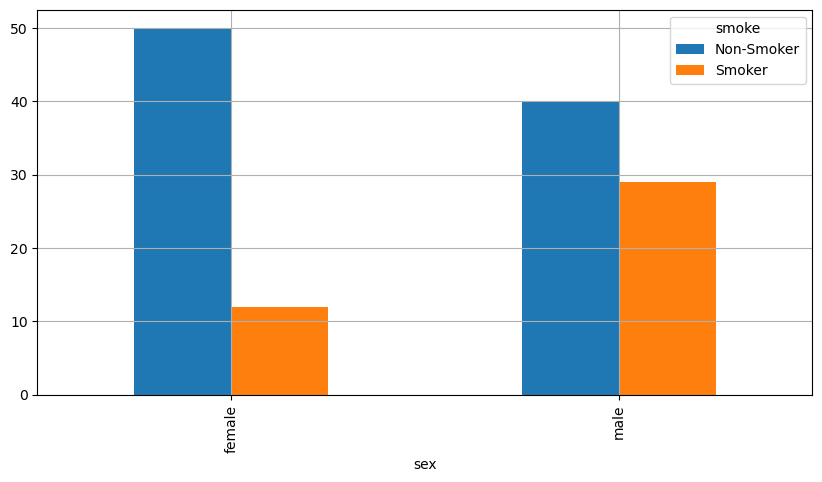

In [6]:
# 성별 별 흡연자 수 시각화

%matplotlib inline
crosstab.plot(kind='bar', figsize=(10,5))
plt.grid()

#카이제곱 검정을 하기에 앞서 항목별 분포를 막대그래프로 시각화한다.
#눈으로 봐도 남성과 여성의 비율 차이가 크게 나는 것을 알 수 있다.
#이러한 차이가 통계적으로 유의미한 차이인지 다음 단계에서 카이제곱 검정을 수행한다.

In [7]:
# 카이제곱 검정

chiresult = chi2_contingency(crosstab, correction=False)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

#P-value가 0.0052로 성별에 따른 흡연자 비율 차이가 통계적으로 유의한 것으로 나타난다.

Chi square: 7.8081404703715105
P-value: 0.005201139711454792
